# Scatter plot with data labels

In [1]:
import os
import platform
import datetime
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
print(mpl.__version__)

3.4.2


**define plotting functions**

In [14]:
def str_format_power_of_ten(text: str) -> str:
    '''
    Assumes a scientific formatted input string of the type 1.27e-05
    and will output $1.27 x 10^{-5}$ with proper power of ten formatting.
    '''
    index = text.index('e')
    mantisse, exponent = text[:index], text[(index + 1):]
    exponent = exponent.lstrip('0+') # strip learding plus sign and zeros from the exponent
    label = mantisse + r'$ \times\mathdefault{10^{' +  exponent + '}}$'
    return label

In [15]:
def str_format_power_of_ten_exponent(text):
    '''
    Assumes a scientific formatted input string of the type 1.27e-05
    and will output the exponent only, e.g. $x 10^{-5}$ with proper power of ten formatting.
    '''
    index = text.index('e')
    exponent = text[(index + 1):]
    label = r'$\mathdefault{\times \, 10^{' +  exponent + '}}$'
    return label

In [16]:
def getFigureProps(width, height, lFrac = 0.17, rFrac = 0.9, bFrac = 0.17, tFrac = 0.9):
    '''
    True size scaling auxiliary function to setup mpl plots with a desired size.
    Specify widht and height in cm.
    lFrac = left fraction   in [0, 1]
    rFrac = right fraction  in [0, 1]
    bFrac = bottom fraction in [0, 1]
    tFrac = top fraction    in [0, 1]
    returns:
        fWidth = figure width
        fHeight = figure height
    These figure width and height values can then be used to create a figure instance
    of the desired size, such that the actual plotting canvas has the specified
    target width and height, as provided by the input parameters of this function.
    '''
    axesWidth = width / 2.54    # convert to inches
    axesHeight = height / 2.54  # convert to inches
    fWidth = axesWidth / (rFrac - lFrac)
    fHeight = axesHeight / (tFrac - bFrac)
    return fWidth, fHeight, lFrac, rFrac, bFrac, tFrac

In [37]:
def Plot(X, outname, outdir, pColors, titlestr = None,
         grid = True, drawLegend = False, xFormat = None, yFormat = None, str_format_func = None,
         savePDF = True, savePNG = False, datestamp = True):

    mpl.rcParams['xtick.top'] = False
    mpl.rcParams['xtick.bottom'] = True
    mpl.rcParams['ytick.right'] = False
    mpl.rcParams['xtick.direction'] = 'out'
    mpl.rcParams['ytick.direction'] = 'in'

    mpl.rc('font', **{'size': 10})
    mpl.rc('legend', **{'fontsize': 9.0})
    mpl.rc('axes', linewidth = 1.0)

    mpl.rc('font', **{'family' : 'sans-serif', 'sans-serif' : ['Helvetica']})
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams['mathtext.fontset'] = 'cm'
    mpl.rcParams['text.latex.preamble'] = \
        r'\usepackage{cmbright}' + \
        r'\usepackage{amsmath}'

    ######################################################################################
    # set up figure
    fWidth, fHeight, lFrac, rFrac, bFrac, tFrac =\
        getFigureProps(width = 5.5, height = 4.5,
                       lFrac = 0.18, rFrac = 0.94,
                       bFrac = 0.20, tFrac = 0.90)
    f, ax1 = plt.subplots(1)
    f.set_size_inches(fWidth, fHeight)
    f.subplots_adjust(left = lFrac, right = rFrac)
    f.subplots_adjust(bottom = bFrac, top = tFrac)
    ######################################################################################
    labelfontsize = 8.0

    for tick in ax1.xaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)

    ax1.tick_params('both', length = 3.5, width = 1.0, which = 'major', pad = 3.0)
    ax1.tick_params('both', length = 2.0, width = 0.5, which = 'minor', pad = 3.0)

    ax1.tick_params(axis = 'x', which = 'major', pad = 2.5)
    ax1.tick_params(axis = 'y', which = 'major', pad = 2.5, zorder = 10)
    ######################################################################################
    # labeling
    if titlestr:
        plt.title(titlestr)
    ax1.set_xlabel(r'x label', fontsize = 8.0)
    ax1.set_ylabel(r'# of items', fontsize = 8.0)
    ax1.xaxis.labelpad = 3.0
    ax1.yaxis.labelpad = 3.0
    ######################################################################################
    # plotting

    lineWidth = 1.0

    ax1.scatter(X[:, 0], X[:, 1],
                s = 20.0,
                lw = lineWidth,
                facecolor = pColors[0],
                edgecolor = 'None',
                zorder = 4,
                clip_on = False)

    ax1.plot(X[:, 0], X[:, 1],
             color = pColors[0],
             alpha = 1.0,
             lw = lineWidth,
             zorder = 2)

    ######################################################################################
    ######################################################################################
    # offset text handling
    ax1 = plt.gca()
    ax1.ticklabel_format(axis = 'y', style = 'sci', scilimits = (0, 2))

    f.savefig('./dummy_figure_TMP.svg')

    offset = ax1.get_yaxis().get_offset_text()
    ax1.yaxis.offsetText.set_visible(False)

    powerLabel = str_format_power_of_ten_exponent(offset.get_text())

    ax1.annotate(powerLabel,
                 xy = (0.0, 1.02),
                 xycoords = 'axes fraction',
                 fontsize = 8.0,
                 horizontalalignment = 'left')
    os.remove('./dummy_figure_TMP.svg')
    ######################################################################################
    ######################################################################################

    ######################################################################################
    # legend
    if drawLegend:
        leg = ax1.legend(# bbox_to_anchor = [0.7, 0.8],
                         # loc = 'upper left',
                         handlelength = 2.0,
                         scatterpoints = 1,
                         markerscale = 1.0,
                         ncol = 1)
        leg.draw_frame(False)
        plt.gca().add_artist(leg)

        # set the linewidth of the legend object
        for legobj in leg.legendHandles:
            legobj.set_linewidth(2.5)

    ######################################################################################
    # set plot range
    if xFormat:
        major_x_ticks = np.arange(xFormat[2], xFormat[3], xFormat[4])
        minor_x_ticks = np.arange(xFormat[2], xFormat[3], xFormat[5])
        ax1.set_xticks(major_x_ticks)
        ax1.set_xticks(minor_x_ticks, minor = True)
        ax1.set_xlim(xFormat[0], xFormat[1])

    if yFormat:
        major_y_ticks = np.arange(yFormat[2], yFormat[3], yFormat[4])
        minor_y_ticks = np.arange(yFormat[2], yFormat[3], yFormat[5])
        ax1.set_yticks(major_y_ticks)
        ax1.set_yticks(minor_y_ticks, minor = True)
        ax1.set_ylim(yFormat[0], yFormat[1])

    ###########################################################################
    # clean tick label formatting
    # Caution: Be sure you know what you are doing. Manual edits like this
    # can cause a lot of headaches if used unaware.
    # Also, when used in conjunction with scientific axis formatting, make
    # sure to call this snippet after the offset text handling to set the
    # scientific axis.
    y_ticklabels = ax1.get_yticklabels() # must be called after f.savefig(...)
    # y_ticklabels is a list
    for y_tick in y_ticklabels:
        tmp = float(y_tick.get_text())
        if np.isclose(tmp, 0.0):
            y_tick.set_text('0')
        elif np.isclose(tmp, 1.0):
            y_tick.set_text('1')
    ax1.set_yticklabels(y_ticklabels)
    ###########################################################################

    ax1.set_axisbelow(False)

    for spine in ax1.spines.values(): # ax1.spines is a dictionary
        spine.set_zorder(10)

    ###########################################################################
    # data point labels (annotations)
    # create data point labels using annotations
    n_datapoints = X.shape[0]

    ymin, ymax = ax1.get_ylim()
    dy = np.abs(ymax - ymin) # y value span  
    y_offset = 0.06 * dy # 6 per cent of y extent

    for i in range(n_datapoints - 1):

        label = f'{int(X[i, 1]):.2e}'
        label = str_format_func(label)
        ax1.annotate(label,
                     xy = (X[i, 0], X[i, 1] - y_offset),
                     xycoords = 'data',
                     fontsize = 6.0,
                     horizontalalignment = 'left',
                     verticalalignment = 'center',
                     zorder = 8,
                     clip_on = False)

    # manually set label for the last data point
    label = f'{int(X[-1, 1]):.2e}'
    label = str_format_func(label)
    ax1.annotate(label,
                 xy = (X[-1, 0] - 1.3, X[-1, 1]),
                 xycoords = 'data',
                 fontsize = 6.0,
                 horizontalalignment = 'left',
                 verticalalignment = 'center',
                 zorder = 8,
                 clip_on = False)

    ######################################################################################
    # grid options
    if grid:
        ax1.yaxis.grid(color = 'gray',
                       linestyle = '--',
                       dashes = [6.0, 3.0],
                       alpha = 0.4,
                       which = 'major',
                       linewidth = 0.5)
        ax1.yaxis.grid('on')
        ax1.yaxis.grid(color = 'gray',
                       linestyle = '--',
                       dashes = [6.0, 3.0],
                       alpha = 0.4,
                       which = 'minor',
                       linewidth = 0.5)
        ax1.yaxis.grid('on', which = 'minor')
    ######################################################################################
    # save to file
    if datestamp:
        outname += '_' + today
    if savePDF: # save to file using pdf backend
        f.savefig(os.path.join(outdir, outname) + '.pdf', dpi = 300, transparent = True)
    if savePNG:
        f.savefig(os.path.join(outdir, outname) + '.png', dpi = 600, transparent = True)
    ######################################################################################
    # close handles
    plt.show()
    plt.cla()
    plt.clf()
    plt.close()
    return outname

**setup data**

In [38]:
    # define dummy data
    X = np.array([[1, 129475],
                  [2, 201450],
                  [3, 335525],
                  [4, 470825],
                  [5, 896275],
                  [6, 1029700]])

    print(type(X))
    print("X.shape =", X.shape)


<class 'numpy.ndarray'>
X.shape = (6, 2)


**call plot function**

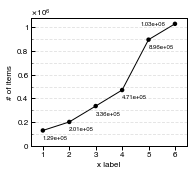

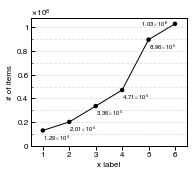

In [39]:
today = datetime.datetime.now().strftime("%Y-%m-%d")

OUTDIR = r'./out'
os.makedirs(OUTDIR, exist_ok = True)

# plot settings
xFormat = (0.55, 6.45, 0.0, 7.5, 1.0, 1.0)
yFormat = (0.0, 1.077e6, 0.0, 1.077e6, 2.0e5, 1.0e5)
pColors = ['k']

# set data label str format functions
data_label_str_formatters = [
    lambda x: x,
    str_format_power_of_ten
]

for i, data_label_str_formatter in enumerate(data_label_str_formatters):

    outname = f'mpl_scatter_plot_with_data_labels_variant_{i}'
    outname += '_Python_' + platform.python_version() + \
            '_mpl_' + mpl.__version__

    outname = Plot(X = X,
                   outname = outname,
                   outdir = OUTDIR,
                   pColors = pColors,
                   xFormat = xFormat,
                   yFormat = yFormat,
                   str_format_func = data_label_str_formatter,
                   savePNG = True)